In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image

In [3]:
gray_image = io.imread("/content/drive/MyDrive/train.zip (Unzipped Files)/train/0/0.png")

In [4]:
im2 = 255 - gray_image

In [5]:
im3 = (100.0/255)*gray_image + 100

In [6]:
im4 = 255.0*(gray_image/255.0)**2

In [7]:
def histeq(im, nbr_bins = 256):
  """  Histogram equalization of a grayscale image.  """
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum()
  cdf = imhist.max()*cdf/cdf.max()
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max() - cdf_mask.min())
  cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
  return cdf[im.astype('uint8')]

img_array = histeq(im4)

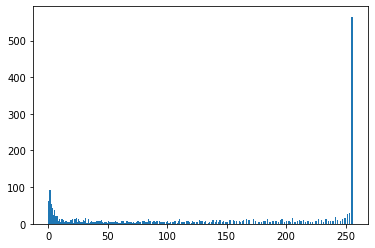

In [8]:
plt.hist(im4.ravel(), bins = 256, range = [0, 256])
plt.show()

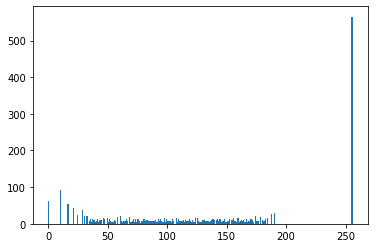

In [9]:
plt.hist(img_array.ravel(), bins = 256, range = [0, 256])
plt.show()

In [10]:
img_array.shape

(48, 48)

In [11]:
print (img_array)

[[38 28 21 ... 37 46 51]
 [32 21 16 ... 35 40 44]
 [32 28 21 ... 35 41 44]
 ...
 [16 46 60 ... 51 75 68]
 [ 0 16 55 ... 52 73 71]
 [ 0  0 36 ... 53 70 68]]


In [12]:
Datadirectory_train = "/content/drive/MyDrive/train.zip (Unzipped Files)/train"

In [13]:
Datadirectory_test = "/content/drive/MyDrive/test.zip (Unzipped Files)/test"

In [14]:
Classes_train = ["0","1","2","3","4","5","6"]

In [15]:
Classes_test = ["0","1","2","3","4","5","6"]

In [16]:
for category in Classes_train:
    path = os.path.join(Datadirectory_train, category)
    for img in os.listdir(path):
        img_array_train = cv2.imread(os.path.join(path,img))
        break
    break

In [17]:
for category in Classes_test:
    path = os.path.join(Datadirectory_test, category)
    for img in os.listdir(path):
        img_array_test = cv2.imread(os.path.join(path,img))
        break
    break

In [18]:
img_size= 224
new_array_train= cv2.resize(img_array_train, (img_size,img_size))

In [19]:
img_size= 224
new_array_test= cv2.resize(img_array_test, (img_size,img_size))

In [20]:
new_array_train.shape

(224, 224, 3)

In [21]:
new_array_test.shape

(224, 224, 3)

In [22]:
training_Data = []

def create_training_Data():
    for category in Classes_train:
        path = os.path.join(Datadirectory_train, category)
        class_num = Classes_train.index(category)
        for img in os.listdir(path):
            try:
                gray_image = cv2.imread(os.path.join(path,img))
                im2 = 255 - gray_image
                im3 = (100.0/255)*gray_image + 100
                im4 = 255.0*(gray_image/255.0)**2
                def histeq(im, nbr_bins = 256):
                  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
                  cdf = imhist.cumsum()
                  cdf = imhist.max()*cdf/cdf.max()
                  cdf_mask = np.ma.masked_equal(cdf, 0)
                  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max() - cdf_mask.min())
                  cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
                  return cdf[im.astype('uint8')]
                im5 = histeq(im4)
                new_array_train= cv2.resize(im5, (img_size,img_size))
                training_Data.append([new_array_train,class_num])
            except Exception as e:
                pass

In [23]:
testing_Data = []

def create_testing_Data():
    for category in Classes_test:
        path = os.path.join(Datadirectory_test, category)
        class_num = Classes_test.index(category)
        for img in os.listdir(path):
            try:
                gray_image = cv2.imread(os.path.join(path,img))
                im2 = 255 - gray_image
                im3 = (100.0/255)*gray_image + 100
                im4 = 255.0*(gray_image/255.0)**2
                def histeq(im, nbr_bins = 256):
                  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
                  cdf = imhist.cumsum()
                  cdf = imhist.max()*cdf/cdf.max()
                  cdf_mask = np.ma.masked_equal(cdf, 0)
                  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max() - cdf_mask.min())
                  cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
                  return cdf[im.astype('uint8')]
                im5 = histeq(im4)
                new_array_test= cv2.resize(im5, (img_size,img_size))
                testing_Data.append([new_array_test,class_num])
            except Exception as e:
                pass

In [24]:
create_training_Data()

print(len(training_Data))

1786


In [25]:
create_testing_Data()

print(len(testing_Data))

69


In [26]:
temp_train = np.array(training_Data)

<ipython-input-26-3773273f491e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp_train = np.array(training_Data)


In [27]:
temp_test = np.array(testing_Data)

<ipython-input-27-6f77fa193065>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp_test = np.array(testing_Data)


In [28]:
temp_train.shape

(1786, 2)

In [29]:
temp_test.shape

(69, 2)

In [30]:
import random

random.shuffle(training_Data)

In [31]:
import random

random.shuffle(testing_Data)

In [32]:
X_train = []
y_train = []
for features,label in training_Data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)

In [33]:
X_test = []
y_test = []
for features,label in testing_Data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)

In [34]:
X_train.shape

(1786, 224, 224, 3)

In [35]:
X_test.shape

(69, 224, 224, 3)

In [36]:
X_train = X_train/255.0;

In [37]:
X_test = X_test/255.0;

In [38]:
type(y_train)

list

In [39]:
type(y_test)

list

In [40]:
y_train[0]

2

In [41]:
y_test[0]

3

In [42]:
Y_train= np.array(y_train)

In [43]:
Y_test = np.array(y_test)

In [44]:
Y_train.shape

(1786,)

In [45]:
Y_test.shape

(69,)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
model = tf.keras.applications.DenseNet201()

In [48]:
model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [49]:
base_input = model.layers[0].input

In [50]:
base_output = model.layers[-2].output

In [51]:
base_output

<KerasTensor: shape=(None, 1920) dtype=float32 (created by layer 'avg_pool')>

In [52]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [53]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [54]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [55]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [56]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [57]:
Y_train[20]

In [ ]:
new_model.fit(X_train, Y_train, epochs = 1)

In [ ]:
new_model.evaluate(X_test, Y_test)

In [ ]:
new_model.save('Final_model_95p07.h5')

In [ ]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
frame = cv2.imread("/content/drive/MyDrive/happy boy (2).jpg")

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
face_Cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
face_Cascade.empty()

In [ ]:
faces = face_Cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
	roi_gray = gray[y:y+h, x:x+w]
	roi_color = frame[y:y+h, x:x+w]
	cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
	facess = face_Cascade.detectMultiScale(roi_gray)
	if len(facess) == 0:
		print("Face not detected")
	else:
		for (ex,ey,ew,eh) in facess:
			face_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
P = np.round(Predictions, 4)

In [ ]:
P

In [ ]:
np.argmax(Predictions)